In [1]:
import os

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import tensorflow as tf
import tensorflow.keras as keras

In [4]:
from scipy import stats

In [5]:
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

### Load Data

In [6]:
data = pd.read_csv('CSV_Files/twitchdata-update.csv')

In [7]:
data.head()

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English


### Exploratory Data Analysis

#### Check String Values

In [8]:
data['Language'].unique()

array(['English', 'Portuguese', 'Spanish', 'German', 'Korean', 'French',
       'Russian', 'Japanese', 'Chinese', 'Czech', 'Turkish', 'Italian',
       'Polish', 'Thai', 'Arabic', 'Slovak', 'Other', 'Hungarian',
       'Greek', 'Finnish', 'Swedish'], dtype=object)

#### Check Null Values

In [9]:
data.isnull().sum()

Channel                 0
Watch time(Minutes)     0
Stream time(minutes)    0
Peak viewers            0
Average viewers         0
Followers               0
Followers gained        0
Views gained            0
Partnered               0
Mature                  0
Language                0
dtype: int64

#### Visualization

#### 1. Heatmap

In [10]:
data.columns

Index(['Channel', 'Watch time(Minutes)', 'Stream time(minutes)',
       'Peak viewers', 'Average viewers', 'Followers', 'Followers gained',
       'Views gained', 'Partnered', 'Mature', 'Language'],
      dtype='object')

In [11]:
vis_data = data.drop(['Channel', 'Partnered', 'Mature', 'Language'], axis=1)
vis_data.head()

,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained
0,6196161750,215250,222720,27716,3246298,1734810,93036735
1,6091677300,211845,310998,25610,5310163,1370184,89705964
2,5644590915,515280,387315,10976,1767635,1023779,102611607
3,3970318140,517740,300575,7714,3944850,703986,106546942
4,3671000070,123660,285644,29602,8938903,2068424,78998587


In [12]:
vis_corr = vis_data.corr()
vis_corr

,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained
Watch time(Minutes),1.000000,0.150588,0.582797,0.476165,0.620234,0.514648,0.529862
Stream time(minutes),0.150588,1.000000,-0.119540,-0.249248,-0.091299,-0.158165,0.064370
Peak viewers,0.582797,-0.119540,1.000000,0.682637,0.532529,0.470415,0.298063
Average viewers,0.476165,-0.249248,0.682637,1.000000,0.428303,0.420097,0.250349
Followers,0.620234,-0.091299,0.532529,0.428303,1.000000,0.715618,0.276467
Followers gained,0.514648,-0.158165,0.470415,0.420097,0.715618,1.000000,0.244297
Views gained,0.529862,0.064370,0.298063,0.250349,0.276467,0.244297,1.000000


In [13]:
extracted = pd.DataFrame(vis_corr.loc['Followers gained']).transpose()
extracted

,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained
Followers gained,0.514648,-0.158165,0.470415,0.420097,0.715618,1.0,0.244297


In [14]:
extracted.to_csv('CSV_Files/extracted_corr.csv', index=False)

<AxesSubplot:>

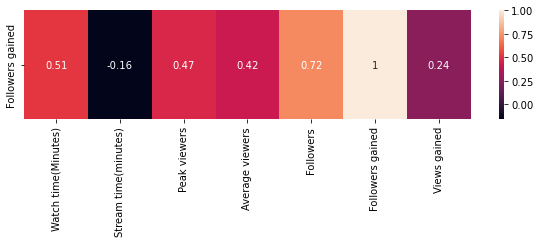

In [15]:
figure, ax = plt.subplots(figsize=(10,2))
figure.set_facecolor('white')
sns.heatmap(ax=ax, data=extracted, annot=True)

**EDA Evaluation 1**
<br>The number of *Followers gained* have the highest correlation with the number of *Followers*, followed by the amount of *Watch time(Minutes)*. While, *Stream time(minutes)* is negatively correlated.

#### 2. Countplot

<AxesSubplot:xlabel='Partnered', ylabel='count'>

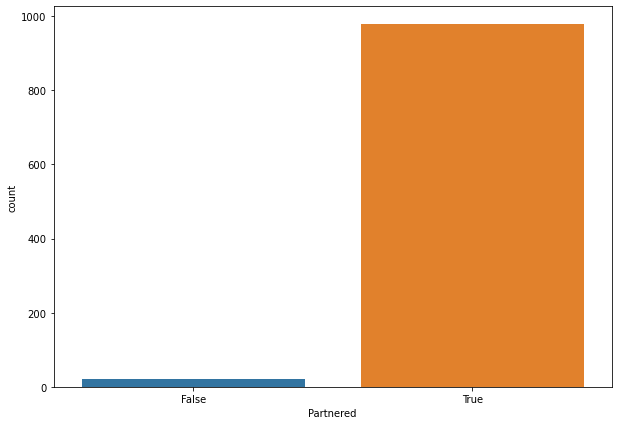

In [16]:
figure, ax = plt.subplots(figsize=(10,7))
figure.set_facecolor('white')
sns.countplot(ax=ax, x=data['Partnered'])

In [17]:
partnered_true = len(data[data['Partnered']==True]['Partnered'])
partnered_false = len(data[data['Partnered']==False]['Partnered'])

partnered_percentage = (partnered_true / (partnered_true + partnered_false)) * 100

print(f"Partnered: {partnered_true}")
print(f"Partnered: {partnered_false}")
print(f"Partnered percentage: {partnered_percentage}")

Partnered: 978
Partnered: 22
Partnered percentage: 97.8


<AxesSubplot:xlabel='Mature', ylabel='count'>

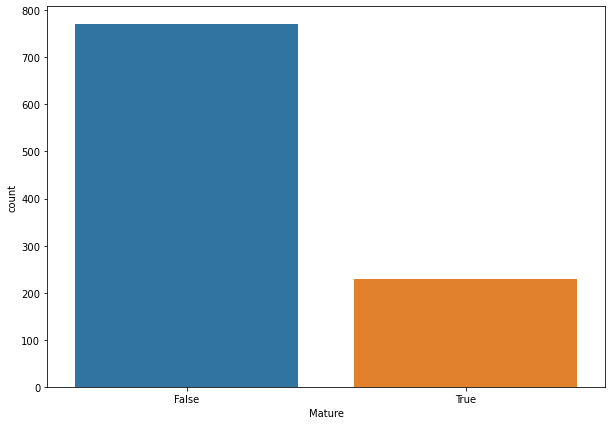

In [18]:
figure, ax = plt.subplots(figsize=(10,7))
figure.set_facecolor('white')
sns.countplot(ax=ax, x=data['Mature'])

In [19]:
mature_true = len(data[data['Mature']==True]['Mature'])
mature_false = len(data[data['Mature']==False]['Mature'])

mature_percentage = (mature_true / (mature_true + mature_false)) * 100

print(f"Mature: {mature_true}")
print(f"Mature: {mature_false}")
print(f"Mature percentage: {mature_percentage}")

Mature: 230
Mature: 770
Mature percentage: 23.0


<AxesSubplot:xlabel='Language', ylabel='count'>

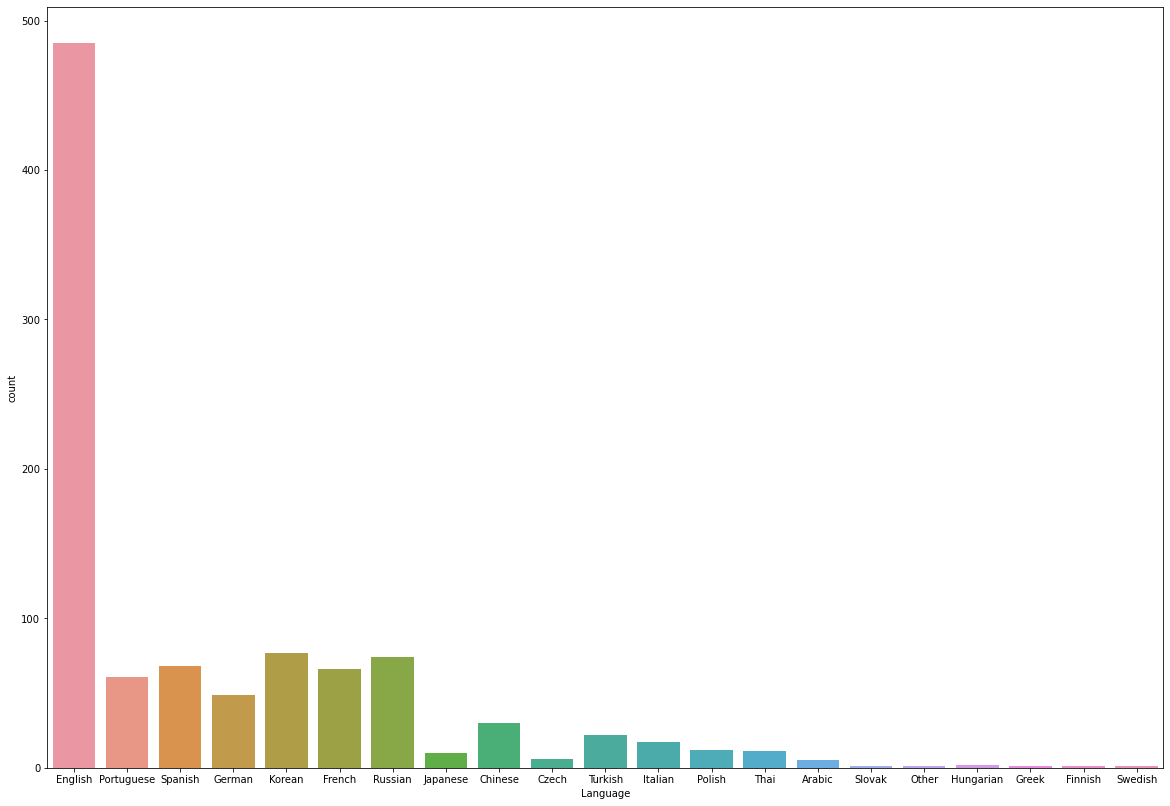

In [20]:
figure, ax = plt.subplots(figsize=(20,14))
figure.set_facecolor('white')
sns.countplot(ax=ax, x=data['Language'])

In [21]:
english = len(data[data['Language']=='English']['Language'])
korean = len(data[data['Language']=='Korean']['Language'])
russian = len(data[data['Language']=='Russian']['Language'])
others = 1000-(english + korean + russian)

english_percentage = round((english / 1000) * 100, 1)
korean_percentage = round((korean / 1000) * 100, 1)
russian_percentage = round((russian / 1000) * 100, 1)
others_percentage = round((others / 1000) * 100, 1)

print(f"English percentage: {english_percentage}")
print(f"Korean percentage: {korean_percentage}")
print(f"Russian percentage: {russian_percentage}")
print(f"Others: {others_percentage}")

English percentage: 48.5
Korean percentage: 7.7
Russian percentage: 7.4
Others: 36.4


**EDA Evaluation 2**
<br>97.8 percent of the streamers are *Partnered*;
<br>23 percent of the streamers are *Mature*;
<br>The top 3 languages used by streamers are English(48.5 percent), Korean(7.7 percent), and Russian(7.4 percent), respectively.

### One-Hot Encoding

In [22]:
data.head()

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English


In [23]:
data.columns

Index(['Channel', 'Watch time(Minutes)', 'Stream time(minutes)',
       'Peak viewers', 'Average viewers', 'Followers', 'Followers gained',
       'Views gained', 'Partnered', 'Mature', 'Language'],
      dtype='object')

In [24]:
partnered = pd.get_dummies(data['Partnered'], drop_first=True)

In [25]:
partnered.head()

,True
0,1
1,1
2,1
3,1
4,1


In [26]:
partnered.rename(columns={True: 'partnered_true'}, inplace=True)

In [27]:
partnered.head()

,partnered_true
0,1
1,1
2,1
3,1
4,1


In [28]:
mature = pd.get_dummies(data['Mature'], drop_first=True)

In [29]:
mature.head()

,True
0,0
1,0
2,1
3,0
4,0


In [30]:
mature.rename(columns={True: 'mature_true'}, inplace=True)

In [31]:
mature.head()

,mature_true
0,0
1,0
2,1
3,0
4,0


In [32]:
language = pd.get_dummies(data['Language'], drop_first=True)

In [33]:
language.head()

,Chinese,Czech,English,Finnish,French,German,Greek,Hungarian,Italian,Japanese,Korean,Other,Polish,Portuguese,Russian,Slovak,Spanish,Swedish,Thai,Turkish
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [34]:
data = pd.concat([data, partnered, mature, language], axis=1)

In [35]:
data.head()

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,...,Korean,Other,Polish,Portuguese,Russian,Slovak,Spanish,Swedish,Thai,Turkish
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,...,0,0,0,0,0,0,0,0,0,0
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,...,0,0,0,0,0,0,0,0,0,0
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,...,0,0,0,1,0,0,0,0,0,0
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,...,0,0,0,0,0,0,0,0,0,0
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,...,0,0,0,0,0,0,0,0,0,0


In [36]:
data.drop(['Partnered', 'Mature', 'Language'], axis=1, inplace=True)

In [37]:
data.head()

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,partnered_true,mature_true,...,Korean,Other,Polish,Portuguese,Russian,Slovak,Spanish,Swedish,Thai,Turkish
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,1,0,...,0,0,0,0,0,0,0,0,0,0
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,1,1,...,0,0,0,1,0,0,0,0,0,0
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,1,0,...,0,0,0,0,0,0,0,0,0,0
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,1,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
data.columns

Index(['Channel', 'Watch time(Minutes)', 'Stream time(minutes)',
       'Peak viewers', 'Average viewers', 'Followers', 'Followers gained',
       'Views gained', 'partnered_true', 'mature_true', 'Chinese', 'Czech',
       'English', 'Finnish', 'French', 'German', 'Greek', 'Hungarian',
       'Italian', 'Japanese', 'Korean', 'Other', 'Polish', 'Portuguese',
       'Russian', 'Slovak', 'Spanish', 'Swedish', 'Thai', 'Turkish'],
      dtype='object')

In [39]:
data.drop('Channel', axis=1, inplace=True)

In [40]:
data.head()

,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,partnered_true,mature_true,Chinese,...,Korean,Other,Polish,Portuguese,Russian,Slovak,Spanish,Swedish,Thai,Turkish
0,6196161750,215250,222720,27716,3246298,1734810,93036735,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6091677300,211845,310998,25610,5310163,1370184,89705964,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5644590915,515280,387315,10976,1767635,1023779,102611607,1,1,0,...,0,0,0,1,0,0,0,0,0,0
3,3970318140,517740,300575,7714,3944850,703986,106546942,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3671000070,123660,285644,29602,8938903,2068424,78998587,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
data['original_index'] = data.index

In [42]:
data.head()

,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,partnered_true,mature_true,Chinese,...,Other,Polish,Portuguese,Russian,Slovak,Spanish,Swedish,Thai,Turkish,original_index
0,6196161750,215250,222720,27716,3246298,1734810,93036735,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6091677300,211845,310998,25610,5310163,1370184,89705964,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,5644590915,515280,387315,10976,1767635,1023779,102611607,1,1,0,...,0,0,1,0,0,0,0,0,0,2
3,3970318140,517740,300575,7714,3944850,703986,106546942,1,0,0,...,0,0,0,0,0,0,0,0,0,3
4,3671000070,123660,285644,29602,8938903,2068424,78998587,1,0,0,...,0,0,0,0,0,0,0,0,0,4


In [43]:
data.columns

Index(['Watch time(Minutes)', 'Stream time(minutes)', 'Peak viewers',
       'Average viewers', 'Followers', 'Followers gained', 'Views gained',
       'partnered_true', 'mature_true', 'Chinese', 'Czech', 'English',
       'Finnish', 'French', 'German', 'Greek', 'Hungarian', 'Italian',
       'Japanese', 'Korean', 'Other', 'Polish', 'Portuguese', 'Russian',
       'Slovak', 'Spanish', 'Swedish', 'Thai', 'Turkish', 'original_index'],
      dtype='object')

In [44]:
data.to_csv('CSV_Files/processed_twitch_data.csv', index=False)

### Train Test Split

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X = data.drop('Followers gained', axis=1)
y = data['Followers gained']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
X_test_indices = pd.DataFrame(X_test['original_index']).values.transpose()[0]
X_test_indices

array([521, 737, 740, 660, 411, 678, 626, 513, 859, 136, 811,  76, 636,
       973, 938, 899, 280, 883, 761, 319, 549, 174, 371, 527, 210, 235,
       101, 986, 902, 947, 346, 139, 621, 499, 370, 198, 687, 584, 901,
        59, 328,  96, 312, 974, 299, 277, 924, 601, 439, 837, 570, 879,
       261, 578,  23,  30, 617,  10, 221, 820, 296,  54, 542, 209, 604,
       692, 662, 866,  70, 543, 107, 493, 590, 741, 292, 289, 652,  39,
       589, 307, 679,  66, 275,  67, 318, 548, 998, 714, 753, 327, 382,
       451, 522, 218, 787, 436, 764,  88,  63, 826, 716, 351, 936, 256,
       635, 644, 554, 959, 168, 917, 528, 823, 985, 816,  86, 432, 184,
       978, 534, 294, 892, 425, 713, 260, 237, 559, 583, 445, 867, 800,
       599, 849, 265, 995, 529,  55, 120, 215,  25,  72,  44, 247, 721,
       281, 893, 914, 810, 244, 822, 321, 643, 158, 977, 429, 941, 462,
       309, 697,  60, 884, 595, 767, 649, 650, 865, 668, 298, 689, 314,
       310, 361, 479, 110, 989, 486, 363, 254, 259, 802, 677, 49

In [49]:
len(X_test_indices)

200

In [50]:
X_train = X_train.drop('original_index', axis=1)

In [51]:
X_train.head()

,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Views gained,partnered_true,mature_true,Chinese,Czech,...,Korean,Other,Polish,Portuguese,Russian,Slovak,Spanish,Swedish,Thai,Turkish
29,1619144100,87450,234826,6734,1724316,43345080,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
535,219998175,90750,7244,2318,149158,3549865,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
695,173672880,35970,20110,4473,318230,5635774,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
557,213819030,94875,19603,2239,272391,4345817,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
836,147243720,129210,6236,1074,80566,1772816,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [52]:
X_train = X_train.values
X_train

array([[1619144100,      87450,     234826, ...,          0,          0,
                 0],
       [ 219998175,      90750,       7244, ...,          0,          0,
                 0],
       [ 173672880,      35970,      20110, ...,          0,          0,
                 0],
       ...,
       [ 142547775,      93015,      12525, ...,          0,          0,
                 0],
       [ 269229795,      66330,      19264, ...,          0,          0,
                 0],
       [ 853324635,      92970,     115737, ...,          0,          0,
                 0]], dtype=int64)

In [53]:
X_test.drop('original_index', axis=1, inplace=True)
X_test = X_test.values

C:\Users\offco\.conda\envs\tf2.6\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [54]:
y_train = y_train.values

In [55]:
y_test = y_test.values

### Data Preprocessing & Model Generation

In [56]:
from sklearn.preprocessing import MinMaxScaler

In [57]:
scaler = MinMaxScaler()

In [58]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [59]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
import keras.backend as K
from keras.losses import mean_squared_error as mse

In [64]:
model = Sequential()

# FIRST DENSE LAYER
model.add(Dense(512, activation='relu', kernel_initializer=keras.initializers.RandomUniform()))
model.add(Dropout(0.5))

# SECOND DENSE LAYER
model.add(Dense(512, activation='relu', kernel_initializer=keras.initializers.RandomUniform()))
model.add(Dropout(0.5))

# THIRD DENSE LAYER
model.add(Dense(256, activation='relu', kernel_initializer=keras.initializers.RandomUniform()))
model.add(Dropout(0.5))

# FOURTH DENSE LAYER
model.add(Dense(256, activation='relu', kernel_initializer=keras.initializers.RandomUniform()))
model.add(Dropout(0.5))

# FIFTH DENSE LAYER
model.add(Dense(128, activation='relu', kernel_initializer=keras.initializers.RandomUniform()))
model.add(Dropout(0.5))

# SIXTH DENSE LAYER
model.add(Dense(128, activation='relu', kernel_initializer=keras.initializers.RandomUniform()))
model.add(Dropout(0.5))

# SEVENTH DENSE LAYER
model.add(Dense(64, activation='relu', kernel_initializer=keras.initializers.RandomUniform()))
model.add(Dropout(0.5))

# EIGHTH DENSE LAYER
model.add(Dense(64, activation='relu', kernel_initializer=keras.initializers.RandomUniform()))
model.add(Dropout(0.5))

# OUTPUT LAYER
model.add(Dense(1))

# COMPILE MODEL
def rmse(y_true, y_pred):
    return K.sqrt(mse(y_true, y_pred))

model.compile(optimizer='adam', loss=rmse)

### Model Training

In [65]:
model.fit(X_train, y_train, 
          validation_data=(X_test, y_test), batch_size=32, epochs=150)

Epoch 1/150
25/25 [==============================] - 1s 16ms/step - loss: 211625.9375 - val_loss: 181074.1250
Epoch 2/150
25/25 [==============================] - 0s 9ms/step - loss: 188530.7656 - val_loss: 132765.4844
Epoch 3/150
25/25 [==============================] - 0s 8ms/step - loss: 166184.3594 - val_loss: 128972.3828
Epoch 4/150
25/25 [==============================] - 0s 8ms/step - loss: 156481.1094 - val_loss: 121625.4688
Epoch 5/150
25/25 [==============================] - 0s 8ms/step - loss: 145248.7031 - val_loss: 108057.6406
Epoch 6/150
25/25 [==============================] - 0s 8ms/step - loss: 137598.5625 - val_loss: 106380.7500
Epoch 7/150
25/25 [==============================] - 0s 8ms/step - loss: 133799.8125 - val_loss: 153703.8438
Epoch 8/150
25/25 [==============================] - 0s 8ms/step - loss: 133690.9531 - val_loss: 138303.4531
Epoch 9/150
25/25 [==============================] - 0s 8ms/step - loss: 123063.0938 - val_loss: 116463.0391
Epoch 10/150
25/25

25/25 [==============================] - 0s 8ms/step - loss: 109952.2734 - val_loss: 105823.1875
Epoch 76/150
25/25 [==============================] - 0s 8ms/step - loss: 108845.0781 - val_loss: 95477.4219
Epoch 77/150
25/25 [==============================] - 0s 8ms/step - loss: 105352.0469 - val_loss: 101866.1875
Epoch 78/150
25/25 [==============================] - 0s 8ms/step - loss: 117221.0000 - val_loss: 96661.4531
Epoch 79/150
25/25 [==============================] - 0s 8ms/step - loss: 108515.2188 - val_loss: 104167.5703
Epoch 80/150
25/25 [==============================] - 0s 8ms/step - loss: 116011.5000 - val_loss: 96520.1016
Epoch 81/150
25/25 [==============================] - 0s 8ms/step - loss: 111308.1016 - val_loss: 99943.0312
Epoch 82/150
25/25 [==============================] - 0s 8ms/step - loss: 107582.7109 - val_loss: 99970.5391
Epoch 83/150
25/25 [==============================] - 0s 8ms/step - loss: 103210.3594 - val_loss: 96240.4688
Epoch 84/150
25/25 [=========

25/25 [==============================] - 0s 8ms/step - loss: 102242.1094 - val_loss: 95910.3984
Epoch 150/150
25/25 [==============================] - 0s 8ms/step - loss: 107673.2891 - val_loss: 94343.1484


### Model Prediction & Evaluation

In [66]:
dnn_pred = model.predict(X_test)

In [67]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score

Mean Squared Error

In [68]:
mean_squared_error(y_test, dnn_pred)

39181973378.84399

Root Mean Squared Error

In [69]:
np.sqrt(mean_squared_error(y_test, dnn_pred))

197944.36940424444

Mean Absolute Error

In [70]:
mean_absolute_error(y_test, dnn_pred)

94343.14071289063

Explained Variance Score

In [71]:
explained_variance_score(y_test, dnn_pred)

0.6377168124372639

Accuracy

In [72]:
r2_score(y_test, dnn_pred) * 100

63.54159579819731

### Output Predictions

In [73]:
dnn_pred

array([[ 138890.27 ],
       [  77782.88 ],
       [  21895.42 ],
       [ 123222.74 ],
       [ 101602.56 ],
       [ 119031.51 ],
       [  66714.43 ],
       [  78400.92 ],
       [  83075.81 ],
       [ 216556.39 ],
       [ 102241.8  ],
       [ 290708.72 ],
       [  88583.984],
       [ 146575.81 ],
       [  74557.07 ],
       [  30924.6  ],
       [  68873.41 ],
       [  67663.51 ],
       [ 108522.66 ],
       [ 110778.79 ],
       [ 108939.52 ],
       [ 174062.34 ],
       [ 112310.01 ],
       [ 125378.48 ],
       [ 358076.6  ],
       [ 130415.805],
       [  96509.19 ],
       [  47376.324],
       [ 138569.92 ],
       [ 142082.1  ],
       [ 206468.02 ],
       [  70908.14 ],
       [  47852.035],
       [ 200632.39 ],
       [  85293.734],
       [  81329.414],
       [  58187.715],
       [ 176226.45 ],
       [  81788.63 ],
       [ 321634.78 ],
       [ 103854.76 ],
       [1712480.9  ],
       [ 225754.39 ],
       [  33199.363],
       [  76391.92 ],
       [  

In [74]:
predictions = pd.DataFrame(dnn_pred)
predictions.head()

,0
0,138890.265625
1,77782.882812
2,21895.419922
3,123222.742188
4,101602.562500


In [75]:
predictions.rename(columns={0: 'prediction'}, inplace=True)
predictions.head()

,prediction
0,138890.265625
1,77782.882812
2,21895.419922
3,123222.742188
4,101602.562500


In [76]:
len(predictions)

200

In [77]:
X_test_indices

array([521, 737, 740, 660, 411, 678, 626, 513, 859, 136, 811,  76, 636,
       973, 938, 899, 280, 883, 761, 319, 549, 174, 371, 527, 210, 235,
       101, 986, 902, 947, 346, 139, 621, 499, 370, 198, 687, 584, 901,
        59, 328,  96, 312, 974, 299, 277, 924, 601, 439, 837, 570, 879,
       261, 578,  23,  30, 617,  10, 221, 820, 296,  54, 542, 209, 604,
       692, 662, 866,  70, 543, 107, 493, 590, 741, 292, 289, 652,  39,
       589, 307, 679,  66, 275,  67, 318, 548, 998, 714, 753, 327, 382,
       451, 522, 218, 787, 436, 764,  88,  63, 826, 716, 351, 936, 256,
       635, 644, 554, 959, 168, 917, 528, 823, 985, 816,  86, 432, 184,
       978, 534, 294, 892, 425, 713, 260, 237, 559, 583, 445, 867, 800,
       599, 849, 265, 995, 529,  55, 120, 215,  25,  72,  44, 247, 721,
       281, 893, 914, 810, 244, 822, 321, 643, 158, 977, 429, 941, 462,
       309, 697,  60, 884, 595, 767, 649, 650, 865, 668, 298, 689, 314,
       310, 361, 479, 110, 989, 486, 363, 254, 259, 802, 677, 49

In [78]:
data = pd.read_csv('CSV_Files/twitchdata-update.csv')

In [79]:
tested_targets = data.iloc[X_test_indices]

In [80]:
tested_targets.head()

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
521,Alderiate,227675805,69030,11480,3337,319860,80730,5471250,True,False,French
737,SmallAnt,166352115,96720,11518,1821,255156,218287,2695198,True,False,English
740,逼比 (bebelolz),165015915,64650,7592,2488,260119,26670,6966348,True,False,Chinese
660,Datto,181075290,71400,82047,2122,530822,89739,4566171,True,True,English
411,cdewx,284645955,139140,23448,1904,380159,50596,8015709,True,False,English


In [81]:
len(tested_targets)

200

In [82]:
channel = pd.DataFrame(tested_targets['Channel']).reset_index().drop('index', axis=1)
channel.head()

,Channel
0,Alderiate
1,SmallAnt
2,逼比 (bebelolz)
3,Datto
4,cdewx


In [83]:
followers_gained = pd.DataFrame(tested_targets['Followers gained']).reset_index().drop('index', axis=1)
followers_gained.head()

,Followers gained
0,80730
1,218287
2,26670
3,89739
4,50596


In [84]:
predictions = pd.concat([channel, followers_gained, predictions], axis=1)

In [85]:
predictions.head()

,Channel,Followers gained,prediction
0,Alderiate,80730,138890.265625
1,SmallAnt,218287,77782.882812
2,逼比 (bebelolz),26670,21895.419922
3,Datto,89739,123222.742188
4,cdewx,50596,101602.562500


In [87]:
predictions.to_csv('Predictions_200.csv', index=False)